In [28]:
import torch
import torchvision
from torchvision.transforms import ToTensor
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
model = torch.hub.load('facebookresearch/barlowtwins:main', 'resnet50')

Downloading: "https://github.com/facebookresearch/barlowtwins/zipball/main" to /Users/dannygeisz/.cache/torch/hub/main.zip
/Users/dannygeisz/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/dannygeisz/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://dl.fbaipublicfiles.com/barlowtwins/ep1000_bs2048_lrw0.2_lrb0.0048_lambd0.0051/resnet50.pth" to /Users/dannygeisz/.cache/torch/hub/checkpoints/resnet50.pth


  0%|          | 0.00/90.0M [00:00<?, ?B/s]

In [12]:
def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
    n,c,w,h = tensor.shape

    if allkernels: tensor = tensor.view(n*c, -1, w, h)
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

    rows = np.min((tensor.shape[0] // nrow + 1, 64))    
    grid = torchvision.utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure( figsize=(nrow,rows) )
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

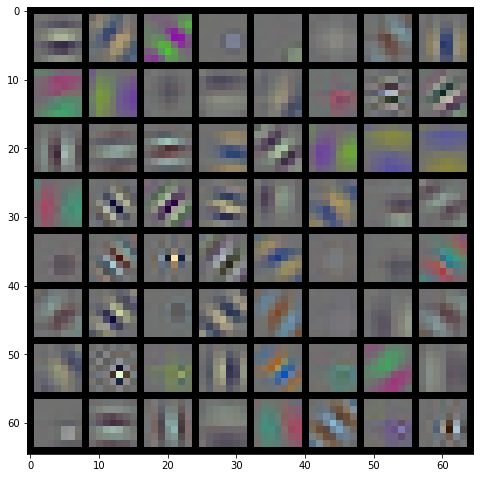

In [21]:
f = model.conv1.weight.data.clone()
visTensor(f)

In [26]:
img = Image.open("fish.jpg")

In [29]:
fish = ToTensor()(img)

In [39]:
fish.shape

torch.Size([3, 375, 500])

In [40]:
C, H, W = fish.shape

a = fish.reshape(1, C, H, W)

In [42]:
a.shape

torch.Size([1, 3, 375, 500])

In [44]:
model(a).shape

torch.Size([1, 1000])